In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_classification

## Working with balanced dataset

In [3]:
X,y = make_classification(n_samples=1000,n_features=20,n_classes=2,random_state=42)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
X_train.shape,X_test.shape

((750, 20), (250, 20))

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
logreg=LogisticRegression()

In [9]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [10]:
y_pred=logreg.predict(X_test)

In [11]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0])

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [13]:
score=accuracy_score(y_test,y_pred)
print(score)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.852
[[104  11]
 [ 26 109]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       115
           1       0.91      0.81      0.85       135

    accuracy                           0.85       250
   macro avg       0.85      0.86      0.85       250
weighted avg       0.86      0.85      0.85       250



# Hyperparameter Tunning Cross-Validation
## Hyperparameter: Hyperparameter are the parameters that applies before the learning process begins and control the learning algorithm
### Learning Rate: In optimization algorithms like gradient descent, the learning rate determines the step size at each iteration while moving toward a minimum of the loss function.
### Regularization Parameters: Parameters like L1 or L2 regularization strength in regression models to prevent overfitting.



## Hyperparametr Tunning:Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning model to improve its performance. Unlike model parameters that are learned from the training data, hyperparameters are set before the training process begins

In [14]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,0.1,0.01,0.001,0.0001]
solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']

In [15]:
param=dict(penalty=penalty,C=c_values,solver=solver)
param

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 0.1, 0.01, 0.001, 0.0001],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga']}

In [16]:
from sklearn.model_selection import StratifiedKFold
CV=StratifiedKFold()

 ## Grid Search:
### Grid search involves specifying a grid of hyperparameters and performing an exhaustive search over all possible combinations. It evaluates the model for each combination using cross-validation and selects the one with the best performance.

In [17]:
## GridSearchCV
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=model,param_grid=param,scoring='accuracy',n_jobs=-1,cv=CV)

In [18]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [19]:
grid.fit(X_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solv

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [20]:
grid.best_score_

0.8786666666666667

In [21]:
grid.best_estimator_

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [22]:
grid.cv_results_

{'mean_fit_time': array([0.003124  , 0.02499738, 0.        , 0.        , 0.        ,
        0.04374533, 0.00937457, 0.        , 0.00937443, 0.00624905,
        0.00937386, 0.00937395, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01249866,
        0.        , 0.        , 0.        , 0.04687014, 0.00312476,
        0.        , 0.01249895, 0.        , 0.01249881, 0.00624928,
        0.00312476, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00312471,
        0.        , 0.00312457, 0.00624948, 0.        , 0.00624948,
        0.00624933, 0.00624933, 0.00624948, 0.        , 0.00312448,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00937405, 0.00312471, 0.00937409,
        0.00624924, 0.        , 0.        , 0.        , 0.        ,
        0.00312471, 0.        ,

In [23]:
y_pred=grid.predict(X_test)

In [24]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.864
[[105  10]
 [ 24 111]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       115
           1       0.92      0.82      0.87       135

    accuracy                           0.86       250
   macro avg       0.87      0.87      0.86       250
weighted avg       0.87      0.86      0.86       250



## Random Search
### Random search selects random combinations of hyperparameters and evaluates them. This method can be more efficient than grid search, especially when the hyperparameter space is large.

In [26]:
from sklearn.model_selection import RandomizedSearchCV
randomcv=RandomizedSearchCV(estimator=model,param_distributions=param,cv=5,scoring="accuracy",random_state=42)

In [27]:
randomcv.fit(X_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 0.1, 0.01, 0.001,
                                              0.0001],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [28]:
randomcv.best_score_

0.8746666666666666

In [29]:
randomcv.best_params_

{'solver': 'newton-cholesky', 'penalty': 'l2', 'C': 0.1}

In [30]:
randomcv.best_estimator_

LogisticRegression(C=0.1, solver='newton-cholesky')

In [31]:
y_pred=randomcv.predict(X_test)

In [32]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.852
[[104  11]
 [ 26 109]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       115
           1       0.91      0.81      0.85       135

    accuracy                           0.85       250
   macro avg       0.85      0.86      0.85       250
weighted avg       0.86      0.85      0.85       250



## Working with imbalanced dataset

In [42]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_informative=2,n_clusters_per_class=2,n_redundant=0,weights=[0.99],random_state=42)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_szie=0.25,random_state=42)

In [50]:
from collections import Counter

In [51]:
Counter(y)

Counter({0: 984, 1: 16})

In [61]:
pd.DataFrame(X)[0]

0     -0.058619
1      0.949277
2      0.595911
3     -1.418866
4      0.871229
         ...   
995   -0.432774
996    1.528391
997   -0.101267
998    0.643761
999    0.698530
Name: 0, Length: 1000, dtype: float64

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='0', ylabel='1'>

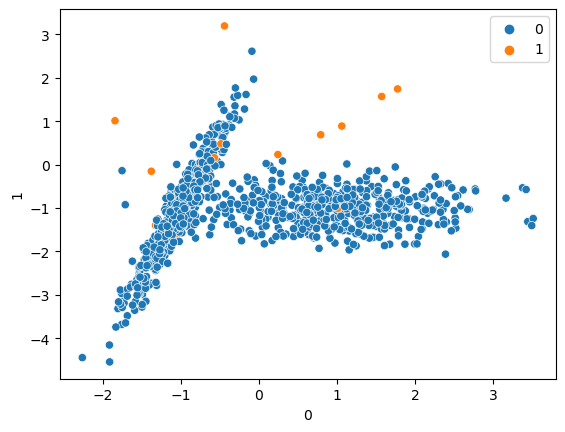

In [65]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [52]:
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [54]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [71]:
model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,0.1,0.01,0.001,0.0001]
solver = ['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
class_weight=[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [72]:
param=dict(penalty=penalty,C=c_values,solver=solver,class_weight=class_weight)

In [73]:
grid=GridSearchCV(estimator=model,param_grid=param,n_jobs=-1,cv=5)

In [74]:
grid

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 0.01, 0.001, 0.0001],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [76]:
grid.fit(X_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
4800 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_s

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 0.01, 0.001, 0.0001],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [78]:
grid.best_score_

0.9893333333333334

In [80]:
grid.best_estimator_

LogisticRegression(C=10, class_weight={0: 100, 1: 50}, solver='sag')

In [81]:
grid.best_params_

{'C': 10, 'class_weight': {0: 100, 1: 50}, 'penalty': 'l2', 'solver': 'sag'}

In [82]:
y_pred=grid.predict(X_test)

In [83]:
score=accuracy_score(y_test,y_pred)
print(score)
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

0.976
[[243   1]
 [  5   1]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       244
           1       0.50      0.17      0.25         6

    accuracy                           0.98       250
   macro avg       0.74      0.58      0.62       250
weighted avg       0.97      0.98      0.97       250

